<a href="https://colab.research.google.com/github/ns90001/Animorphs/blob/master/StyleGAN_Paintings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/NVlabs/stylegan

fatal: destination path 'stylegan' already exists and is not an empty directory.


In [2]:
%cd stylegan

/content/stylegan


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [5]:
import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config

In [6]:
tflib.init_tf()

In [7]:
model_path = "/content/drive/My Drive/Data Science/karras2019stylegan-cats-256x256.pkl"

In [8]:
with open(model_path,"rb") as f:
        _G, _D, Gs = pickle.load(f)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)

In [63]:
latent_vector1 = np.random.randn(1, Gs.input_shape[1])
latent_vector2 = np.random.randn(1, Gs.input_shape[1]) # uncomment for morphing

In [46]:
#rnd = np.random.RandomState(1337)

# latent_vector1 = np.random.randn(1, Gs.input_shape[1])
# latent_vector2 = np.random.randn(1, Gs.input_shape[1])

number_of_frames = 480

frame_step = 1.0/number_of_frames
x = 0
for frame_count in range(1,number_of_frames):
    x = x + frame_step
    latent_input = x*latent_vector2 + (1-x)*latent_vector1
    # latent_input = latent_vector1.copy()
    # for i in range(512):
    #     f1 = latent_vector1[0][i]
    #     f2 = latent_vector2[0][i]
    #     if f1 > f2:
    #         tmp = f2
    #         f2 = f1
    #         f1 = tmp
    #     fnew = f1 + (f2-f1)*x
    #     latent_input[0][i] = fnew
    images = Gs.run(latent_input, None, truncation_psi=1, randomize_noise=False, output_transform=fmt)

    # Save image.
    os.makedirs(config.result_dir, exist_ok=True)
    png_filename = os.path.join(config.result_dir, 'animation_'+str(frame_count)+'.png')
    PIL.Image.fromarray(images[0], 'RGB').save(png_filename)

In [47]:
import os
if os.path.exists('./output.mp4'):
   os.remove('./output.mp4')

! ffmpeg -framerate 30 -i results/animation_%d.png -vcodec libx264 -pix_fmt yuv420p output.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [48]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('output.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="50%" height="50%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

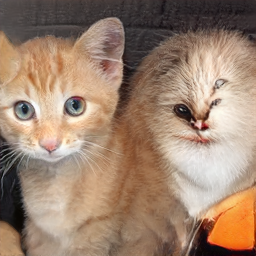

In [64]:
images = Gs.run(latent_vector1, None, truncation_psi=1, randomize_noise=False, output_transform=fmt)
PIL.Image.fromarray(images[0])